> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. You will see some overlap in the initial tasks as the data is cleaned.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

We will be using the same San Francisco rent dataset as in Lab 4.  Some rentals are apartments, others are for homes, and there may be some other random properties for rent.  Each row represents one rental listing.

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library for dataframes.  Then `Matplotlib` and `Seaborn` for data visualization.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [9]:
# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [10]:
# Preview the first rows
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## Part 2: Inspecting Data Quality

### Instructions:
- Check for outliers or invalid data in key numeric variables like `price`, `sqft`, `beds`, or `baths`.  The concept of outliers will be covered more in week 6.  This week we will just look for outliers, but we won't take steps to remove them.     

In [11]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


### In Your Response:
- Do any numeric variables contain extreme or unusual values?
- Should those outlier values be removed?  Or are they valid rental properties?

### ✍️ Your Response: 🔧
1. I see outliers on all four variables, especially price and sqft. The maximum value of all variables has a greater range to the 75th percentile than the IQR, for example with sqft, the IQR is 610 but the range between the 75th percentile and max is 898,640 indicating an extreame outlier. Another example with SQFT variable is the STDEV is 5000 with a mean of about 1200, since the STDEV is much greater than the mean, this would indicate a heavy rightward skew in the population, this being casued by rightward outliers.
2. Yes the outliers should be removed if and where possible to get a better representatation of the overall population.

## Part 3: Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


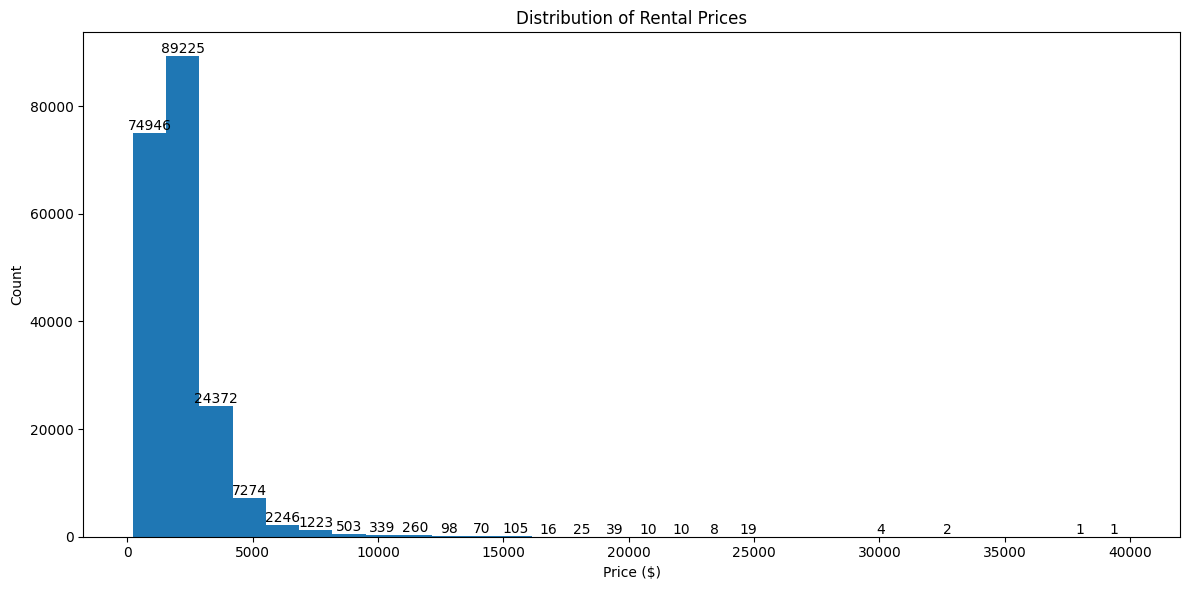

In [31]:

# Histogram: Price
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")

for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0: # Only label bars that have a count
        ax.text(patches[i].get_x() + patches[i].get_width() / 2, height,
                f'{int(height)}',
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

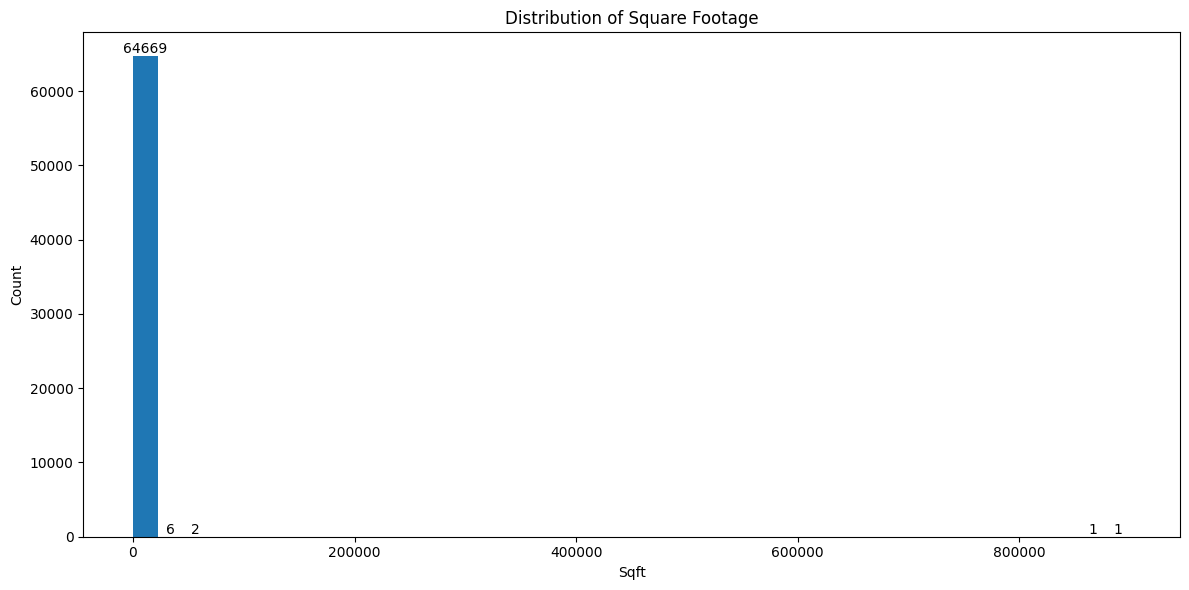

In [30]:
# Histogram: Square Footage
fig, ax = plt.subplots(figsize=(12, 6))
n, bins, patches = ax.hist(df['sqft'].dropna(), bins=40)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0: # Only label bars that have a count
        ax.text(patches[i].get_x() + patches[i].get_width() / 2, height,
                f'{int(height)}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

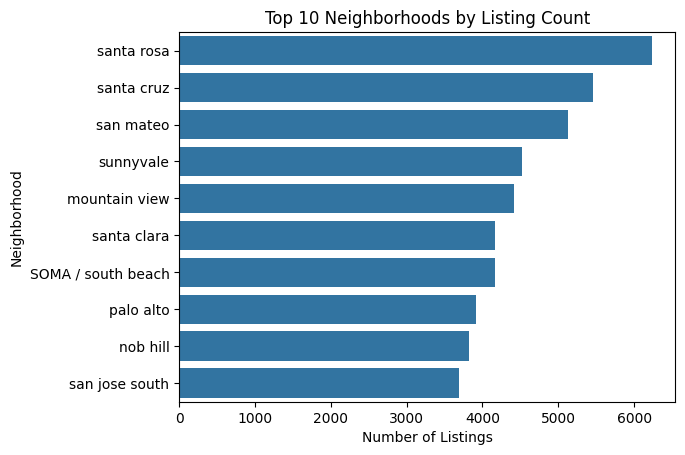

In [29]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

### In Your Response:

After creating each of the visuals, write 1–2 sentences explaining what you notice in each.


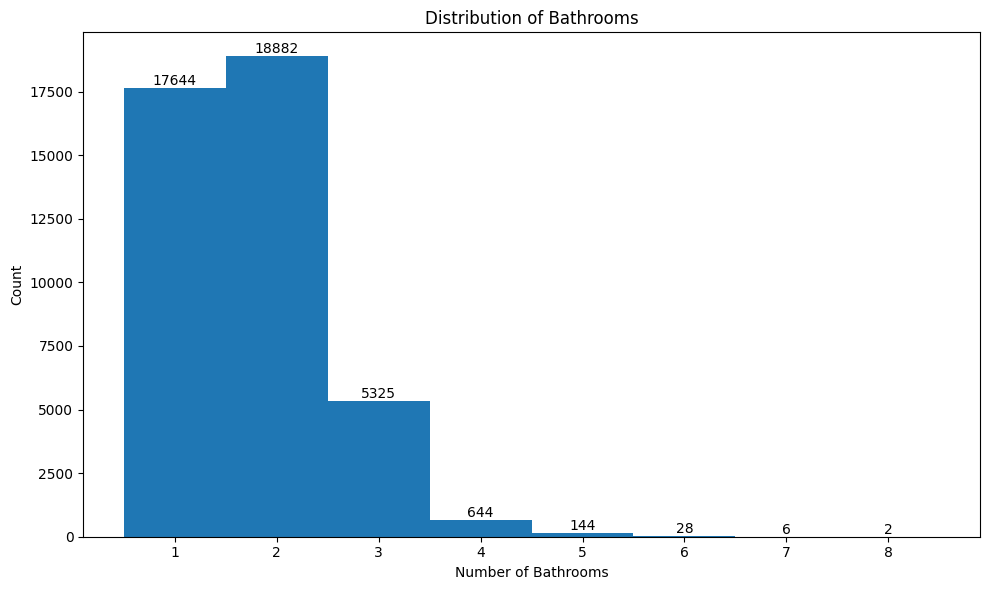

In [39]:
# Visual 1: Histogram of baths

fig, ax = plt.subplots(figsize=(10, 6))
min_baths = df['baths'].min()
max_baths = df['baths'].max()
bins = np.arange(min_baths - 0.5, max_baths + 1.5, 1)
n, _, patches = ax.hist(df['baths'].dropna(), bins=bins, rwidth=1)
plt.title("Distribution of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
for i in range(len(patches)):
    height = patches[i].get_height()
    if height > 0:
        ax.text(patches[i].get_x() + patches[i].get_width() / 2, height,
                f'{int(height)}',
                ha='center', va='bottom')
plt.xticks(np.arange(min_baths, max_baths + 1, 1))
plt.tight_layout()
plt.show()

### ✍️ Visual 1 Response: 🔧
1. Similar to the price variable, the bathroom variable shows a skightly less but still very highly skewed distribution. As you can see about 98% of all properties have 3 bathrooms or less, with most of those being 1 or 2. Just 2% of the population have more than 3, and only 8 of the entire 42,675 population have 7 or more, so few the bar doesn't even appear on the chart.

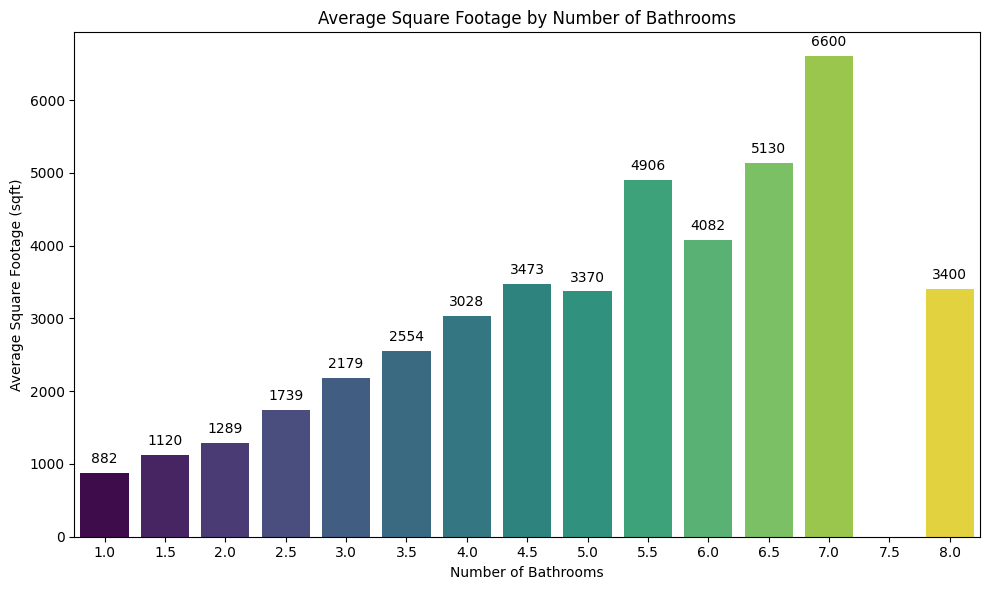

In [42]:
# Visual 2: Bar chart of average square footage by number of bathrooms
avg_sqft_baths = df.groupby('baths')['sqft'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='baths', y='sqft', data=avg_sqft_baths, palette='viridis', hue='baths', legend=False)
plt.title("Average Square Footage by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Square Footage (sqft)")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

### ✍️ Visual 2 Response: 🔧
1. For the most part the distribution shows a rather proportional correlation between square footage and bathrooms. Interestingly enough this hold true until 7.5 and 8 where the square footage begins to become negatively correlated, for reasons I couldn't guess without some more information and context.

## Part 4: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [43]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.450096,0.433553,0.074310
beds,0.450096,1.000000,0.651835,0.707235
baths,0.433553,0.651835,1.000000,0.645372
sqft,0.074310,0.707235,0.645372,1.000000


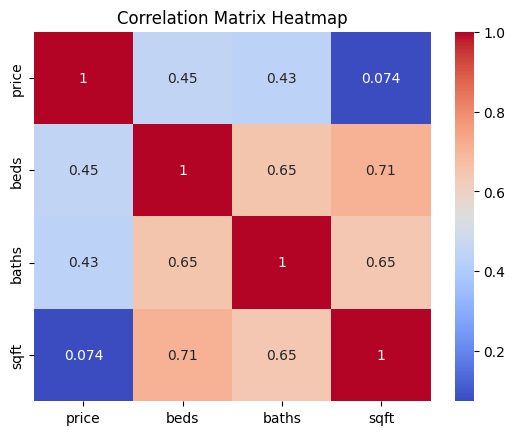

In [44]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

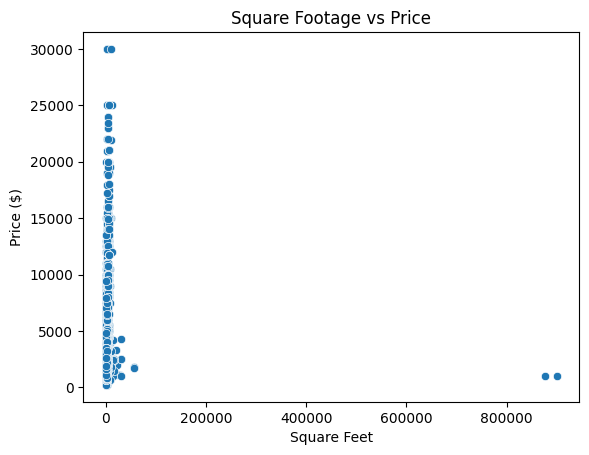

In [45]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

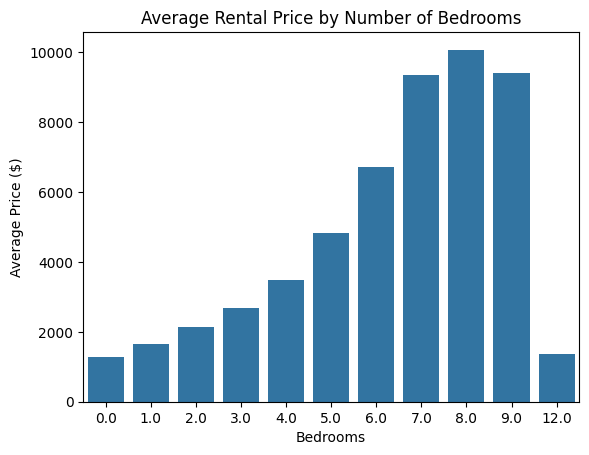

In [46]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.

### In Your Response:
1. What trends or outliers do you see?

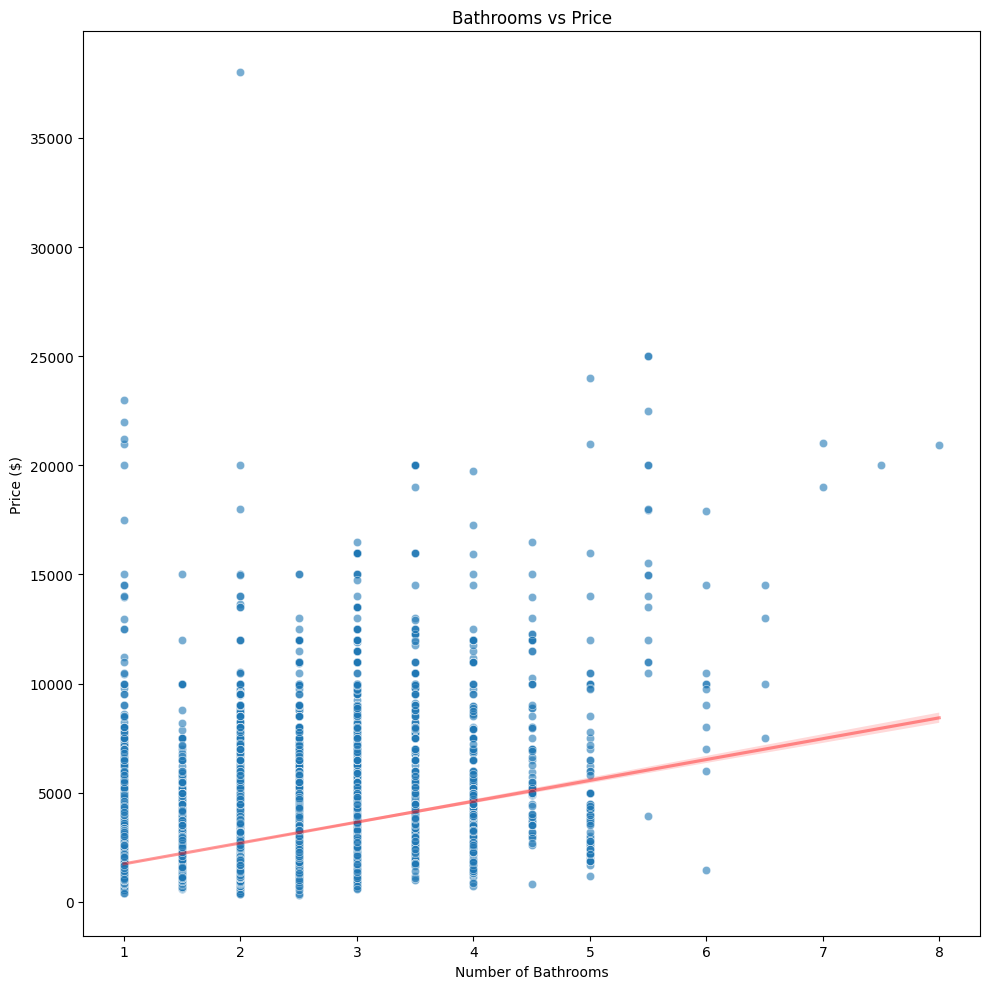

In [50]:
#1 Scatterplot: baths vs price
plt.figure(figsize=(10, 10))
sns.scatterplot(x='baths', y='price', data=df, alpha=0.6)
sns.regplot(x='baths', y='price', data=df, scatter=False, color='red', line_kws={'alpha':0.4})
plt.title("Bathrooms vs Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

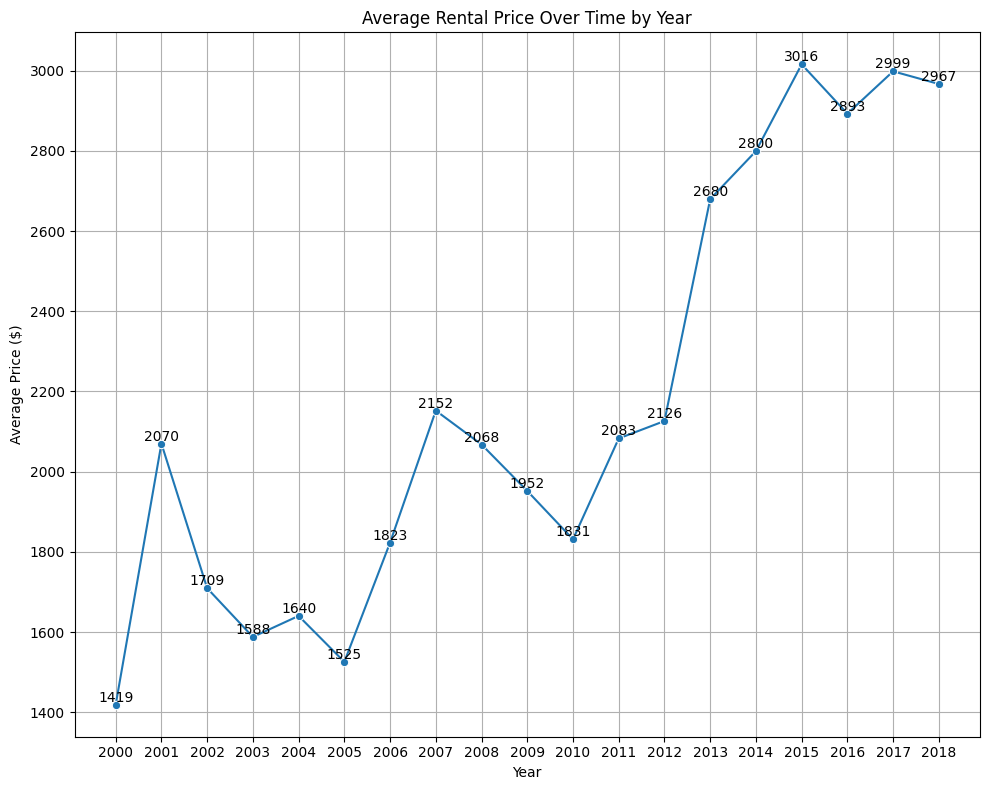

In [55]:
#2 Average price over time by year
avg_price_by_year = df.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(x='year', y='price', data=avg_price_by_year, marker='o')
plt.title("Average Rental Price Over Time by Year")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.grid(True)
for index, row in avg_price_by_year.iterrows():
    plt.text(row['year'], row['price'], f'{row['price']:.0f}', ha='center', va='bottom')
plt.xticks(avg_price_by_year['year'])
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1.

## 🔧  Part 5: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

### ✍️ Your Response: 🔧
1. Number of bedrooms and number of bathrooms show the strogest correltion to price, with SQFT having a rather weeak correlation
2. There doesn't seem to be much of a relationship between price and SQFT with a correlation coefficient of under 0.1, Price and bedrooms does seem to have a moderatley positive relationship, with the number of bedrooms moderatley indicating higher average price.
3. Prices peaked after a sharp increase in 2015 with very modest reductions since
4. I think a regression analysis might have been interesting to look at. A scatter plot between price and sqft would be cool to see as well, or price and bedrooms.
5.

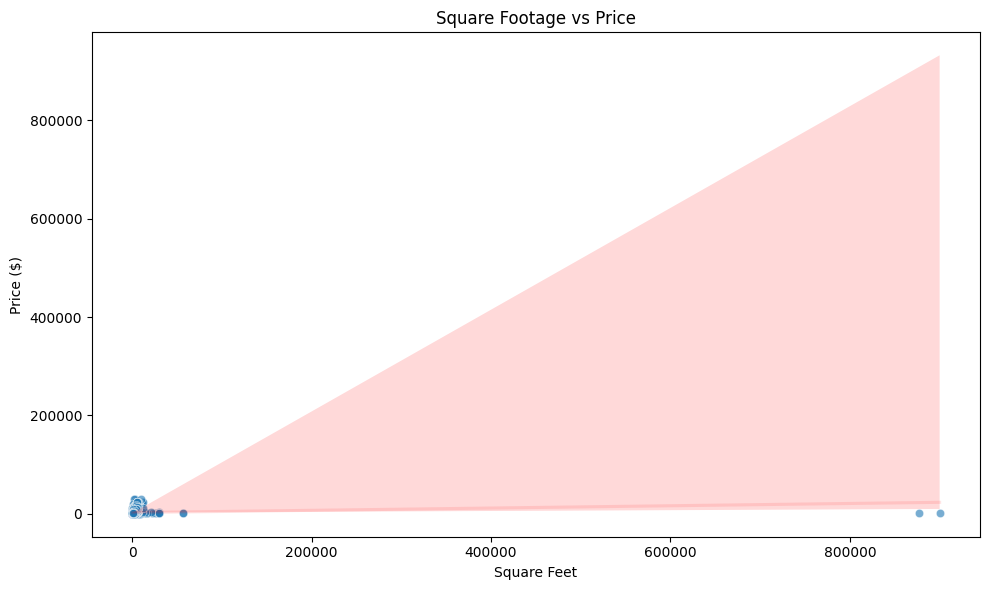

In [59]:
# New Scatterplot: Square Footage vs Price with Faint Trendline
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y='price', data=df, alpha=0.6)
sns.regplot(x='sqft', y='price', data=df, scatter=False, color='red', line_kws={'alpha':0.1})
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

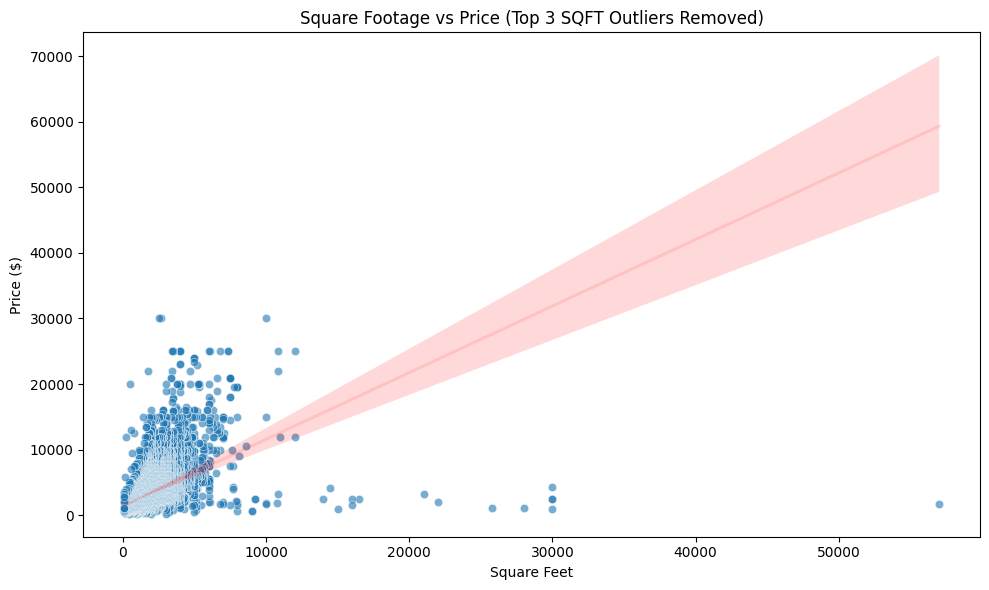

In [58]:
# Remove the three largest sqft outliers
df_filtered = df.sort_values(by='sqft', ascending=False).iloc[3:]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y='price', data=df_filtered, alpha=0.6)
sns.regplot(x='sqft', y='price', data=df_filtered, scatter=False, color='red', line_kws={'alpha':0.1})
plt.title("Square Footage vs Price (Top 3 SQFT Outliers Removed)")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_05_FugalEric.ipynb"